![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Detection of Threat Objects in Baggage Inspection

This code is based on tutorial of YOLOv5 developed by Ultralytics: https://github.com/ultralytics/yolov5  


Reference:

Saavedra, D., Banerjee, S., & Mery, D. (2020). [Detection of threat objects in baggage inspection with X-ray images using deep learning](https://link.springer.com/article/10.1007/s00521-020-05521-2). Neural Computing and Applications, 1-17.

# Environment Setup
Download and install in Colab required packages and import libraries.

In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15997, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 15997 (delta 19), reused 19 (delta 12), pack-reused 15967
Receiving objects: 100% (15997/15997), 14.58 MiB | 18.06 MiB/s, done.
Resolving deltas: 100% (10985/10985), done.


In [ ]:
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)

In [ ]:
%cd yolov5

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('YOLOv5 library downloaded and installed.')
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

YOLOv5 library downloaded and installed.
Setup complete. Using torch 2.0.1+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


# Download data

X-ray images generated by Daniel Saavedra in https://github.com/dlsaavedra/Detector_GDXray. It consists on Training, Testing and Validation images.

There are two datasets:

* Simple: it can be used to train this model in 5-10 minutes, so the reader can see how this code works. It has 1000 X-ray images for training and 100 for validation. They were randomly selected from full dataset.
* Full: it is used to train de model with all images with 7680 images for training and 1920 for testing. It takes a couple of hours.

In [ ]:
# 0: simple dataset with 1000/ 100/200  images for train/val/test
!wget https://www.dropbox.com/s/jkklo8m4w21bhdx/dataset_threats_simple.zip
DATASET_NAME = 'threats_simple'


# 1: full dataset   with 7680/1920/200  images for train/val/test
#!wget https://www.dropbox.com/s/czyd9oi360i2p0k/dataset_threats_full.zip


--2023-09-28 12:04:01--  https://www.dropbox.com/s/jkklo8m4w21bhdx/dataset_threats_simple.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jkklo8m4w21bhdx/dataset_threats_simple.zip [following]
--2023-09-28 12:04:01--  https://www.dropbox.com/s/raw/jkklo8m4w21bhdx/dataset_threats_simple.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc52e6b3ead5229c801a3f7e0b89.dl.dropboxusercontent.com/cd/0/inline/CEkKxzm1bg1S0WMaEpH6FhjLQDl90TiMmEaanCTHCEjy0auZz9li2cL7zJ-T_XJ1lTZxPRyqL-X5uoyqpaLIeGI4tsDghVgny-cynqmuJhTD_SrPa55WXRy3xkNr2NZMp-A/file# [following]
--2023-09-28 12:04:01--  https://uc52e6b3ead5229c801a3f7e0b89.dl.dropboxusercontent.com/cd/0/inline/CEkKxzm1bg1S0WMaEpH6FhjLQDl90TiMmEaanCTHCEjy0auZz9li2cL7zJ-T_XJ1lTZxPRyqL-X5uoyqp

In [ ]:
!unzip -qq dataset_threats_simple.zip

In [ ]:
# Download training images and annotations
if dataset == 0:
  #!wget https://www.dropbox.com/s/gfyxeeyxqdemxsj/threats_simple.zip
  !wget https://www.dropbox.com/s/jkklo8m4w21bhdx/dataset_threats_simple.zip
else:
  !wget https://www.dropbox.com/s/v7m2ckfg2lk7syn/threats_full.zip
!unzip -qq {DATASET_NAME}.zip
!rm {DATASET_NAME}.zip
!mv ./{DATASET_NAME} ../{DATASET_NAME}  # move folder alongside /yolov5
!cp ../{DATASET_NAME}/threats.yaml data/threats.yaml
#clear_output()
print('Dataset '+DATASET_NAME + ' unzipped and copied.')

--2023-09-27 15:22:09--  https://www.dropbox.com/s/jkklo8m4w21bhdx/dataset_threats_simple.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jkklo8m4w21bhdx/dataset_threats_simple.zip [following]
--2023-09-27 15:22:10--  https://www.dropbox.com/s/raw/jkklo8m4w21bhdx/dataset_threats_simple.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ac89d270f4ef4863258f1192d.dl.dropboxusercontent.com/cd/0/inline/CEhChCk9EM6ILGAfMC9T0ryoJDFV9KTx-LuE9Gnp5vYmlqkPi3GRixCqFXDUt6BLLWYRbh2x7GR518bTdvdD29ibdMObaoFqWNUh6Gb4UX1Uh9GLd3JxMHHKAwZnEF2SWD4/file# [following]
--2023-09-27 15:22:10--  https://uc3ac89d270f4ef4863258f1192d.dl.dropboxusercontent.com/cd/0/inline/CEhChCk9EM6ILGAfMC9T0ryoJDFV9KTx-LuE9Gnp5vYmlqkPi3GRixCqFXDUt6BLLWYRbh2x7GR518

# Setup training parameters

Select model of YOLOv5, number of epochs, batchs, etc.

In [ ]:
YOLO_MODEL     = 'yolov5s' # puede ser yolov5m, yolov5l, yolov5x
EPOCHS         = 70
CFG            = YOLO_MODEL+'.yaml'
TRAIN_WEIGHTS  = YOLO_MODEL+'pt'
BATCH          = 8
IMG_SIZE       = 640
YAMLFILE       = 'threats.yaml'

In [ ]:
!cp dataset/threats.yaml data/threats.yaml


In [ ]:
!mv dataset threats_simple  # move folder alongside /yolov5


# Training

YOLOv5 model will be trained according setup of last cell using `{YOLO_MODEL}`, eg `yolov5s`.

In [ ]:
!python train.py --img {IMG_SIZE} --batch {BATCH} --epochs {EPOCHS} --data {YAMLFILE} --cfg {CFG} --weights {TRAIN_WEIGHTS} --nosave --cache

train: weights=yolov5spt, cfg=yolov5s.yaml, data=threats.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=70, batch_size=8, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hs

# Evaluation of Performance

In [ ]:
TEST_WEIGHTS = 'runs/train/exp/weights/last.pt'  # ver path en las ultimas lineas de la ejecución anterior
PATH_TEST    = DATASET_NAME+'/images/test'
PATH_VAL     = DATASET_NAME+'/images/val'

# Detection of Bounding boxes in testing images

In [ ]:
!python detect.py --weights {TEST_WEIGHTS} --img {IMG_SIZE} --conf 0.4 --source  {PATH_TEST}

detect: weights=['runs/train/exp/weights/last.pt'], source=threats_simple/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/200 /content/yolov5/threats_simple/images/test/test_00001.jpg: 544x640 1 Gun, 1 Knife, 44.3ms
image 2/200 /content/yolov5/threats_simple/images/test/test_00002.jpg: 544x640 1 Knife, 11.3ms
image 3/200 /content/yolov5/threats_simple/images/test/test_00003.jpg: 544x640 1 Gun, 1 Knife, 11.3ms
image 4/200 /content/yo

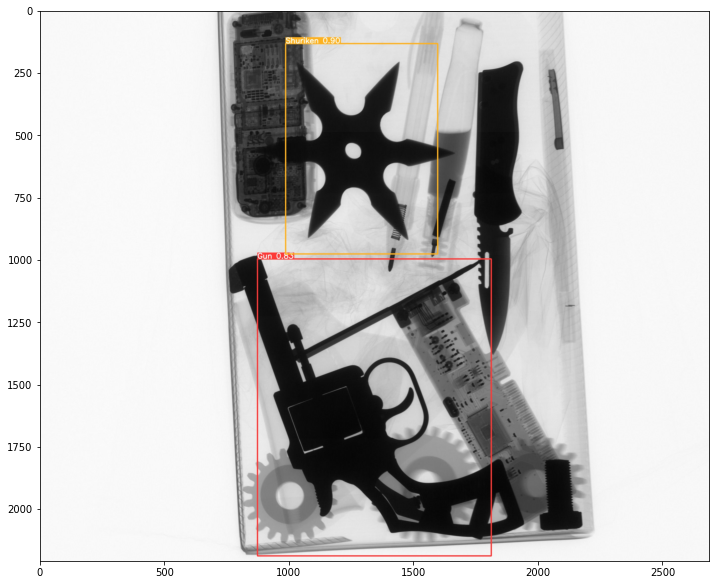

In [ ]:
import cv2
import matplotlib.pyplot as plt

X = cv2.imread('runs/detect/exp2/test_00183.jpg')

plt.figure(figsize=(12,16))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.show()



# Validation performance

In [ ]:
!python val.py --weights {TEST_WEIGHTS} --data {YAMLFILE} --img {IMG_SIZE} --iou 0.25 --half

val: data=/content/yolov5/data/threats.yaml, weights=['runs/train/exp3/weights/last.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.25, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True
YOLOv5 🚀 v6.0-23-ga18b0c3 torch 1.9.0+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '../threats_simple/labels/val.cache' images and labels... 100 found, 0 missing, 0 empty, 0 corrupted: 100% 100/100 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 4/4 [00:02<00:00,  1.83it/s]
                 all        100        245       0.89      0.738      0.794      0.575
                 Gun        100         60      0.989        0.8      0.837      0.619
               Knife        100         55      0.888

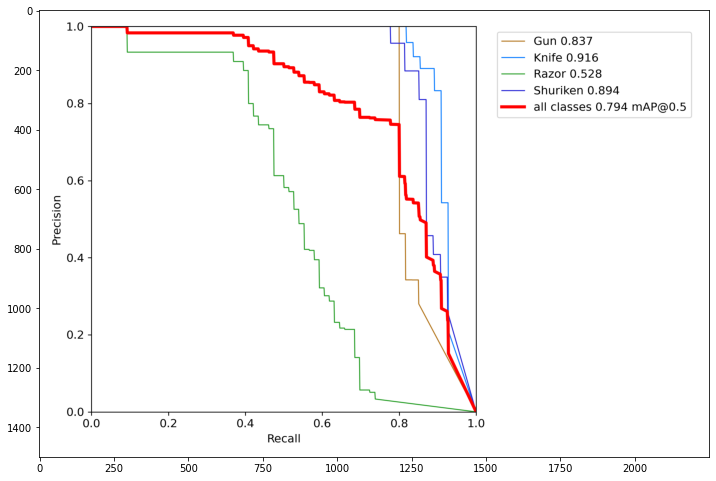

In [ ]:
I = cv2.imread('runs/val/exp3/PR_curve.png')
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

# Testing performance

In [ ]:
!python val.py --weights {TEST_WEIGHTS} --data {YAMLFILE} --img {IMG_SIZE} --iou 0.25 --task test

val: data=/content/yolov5/data/threats.yaml, weights=['runs/train/exp3/weights/last.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.25, task=test, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False
YOLOv5 🚀 v6.0-23-ga18b0c3 torch 1.9.0+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '../threats_simple/labels/test.cache' images and labels... 199 found, 1 missing, 0 empty, 0 corrupted: 100% 200/200 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 7/7 [00:08<00:00,  1.23s/it]
                 all        200        345      0.473      0.414      0.399       0.25
                 Gun        200        210      0.988      0.774      0.959       0.66
               Knife        200         24     0.

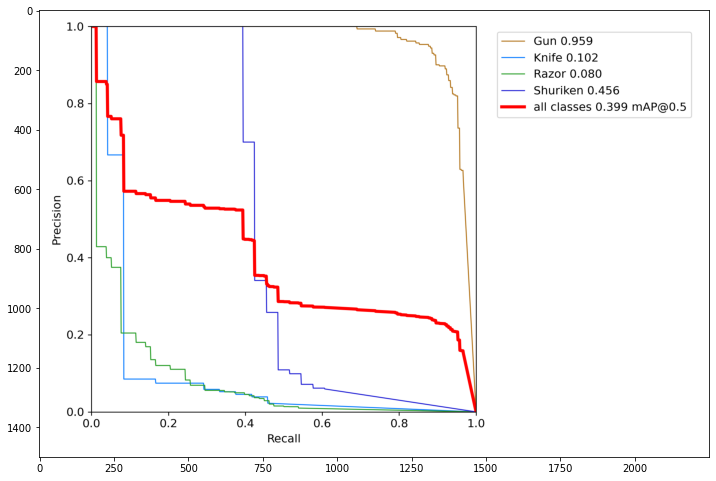

In [ ]:
I = cv2.imread('runs/val/exp4/PR_curve.png')
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

In [ ]:
import os, fnmatch

def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names

In [ ]:
tpath    = '../'+DATASET_NAME+'/images/test'
lpath    = '../'+DATASET_NAME+'/labels/test'
img_names = dirfiles(tpath,'*.jpg')
i = 0
img_names[i]

'test_00001.jpg'

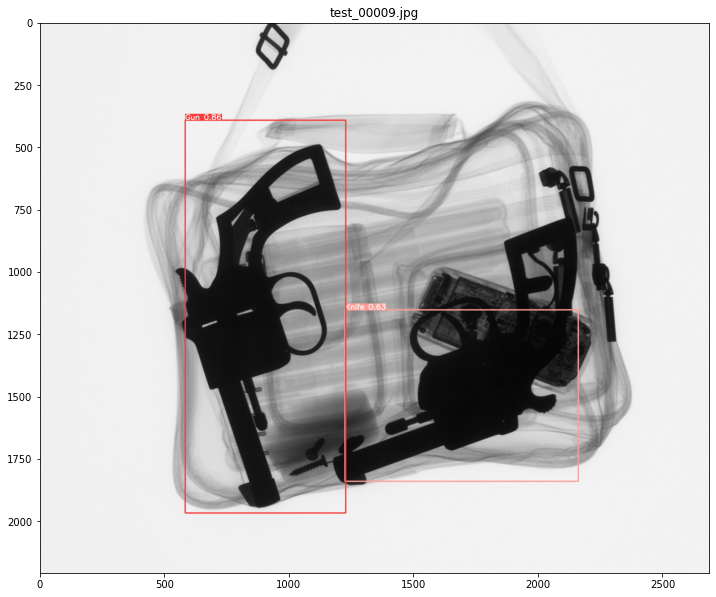

In [ ]:
i = i+2
iname = img_names[i]
X = cv2.imread('runs/detect/exp2/'+iname)
N = X.shape[0]
M = X.shape[1]
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title(iname)
lname = lpath+iname[:-4]+'.txt'
if os.path.isfile(lname):
  arr = np.loadtxt(lname)
  if len(arr.shape)==1:
    n = 1
  else:
    n = arr.shape[0]
  for k in range(n):
    if n>1:
        z = arr[k,:]
    else:
        z = arr
    x = z[1]*M
    y = z[2]*N
    w2 = z[3]*M/2
    h2 = z[4]*N/2
    x1 = x-w2
    x2 = x+w2
    y1 = y-h2
    y2 = y+h2
    plt.plot([x1,x1,x2,x2,x1],[y1,y2,y2,y1,y1],'g')
    k = k+1

plt.show()
